In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel, CoherenceModel, LdaSeqModel
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.corpus import stopwords
from konlpy.tag import Okt

C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space', 
              'comp.sys.ibm.pc.hardware', 'sci.crypt']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
print(len(newsgroups_train.data))

3219


In [3]:
cv = CountVectorizer(token_pattern="[\w']{2,}", stop_words='english', max_features=2000, min_df=5, max_df=0.5)

In [4]:
review_cv = cv.fit_transform(newsgroups_train.data)
review_cv.shape

(3219, 2000)

In [5]:
np.set_printoptions(precision=3)

In [23]:
lda = LatentDirichletAllocation(n_components=9, max_iter=5, doc_topic_prior=1.0, topic_word_prior=0.1,
                                learning_method='online', n_jobs=-1, random_state=0)

In [24]:
review_topic = lda.fit_transform(review_cv)
review_topic.shape, review_topic[0]

((3219, 9),
 array([0.05 , 0.018, 0.014, 0.024, 0.008, 0.008, 0.863, 0.007, 0.008]))

In [25]:
gross_topic_weights = np.mean(review_topic, axis=0)
gross_topic_weights

array([0.101, 0.114, 0.071, 0.148, 0.078, 0.122, 0.092, 0.086, 0.187])

In [26]:
lda.components_.shape, cv.get_feature_names_out()[lda.components_[0].argsort()[:-11:-1]]

((9, 2000),
 array(['god', 'jesus', 'bible', 'does', 'john', 'question', 'point',
        'time', 'know', 'christian'], dtype=object))

In [27]:
def print_top_words(model, feature_names, n_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}: {', '.join([feature_names[i] for i in topic.argsort()[:-n_top_words-1:-1]])}")
    print()

In [28]:
print_top_words(lda, cv.get_feature_names_out())

Topic #0: god, jesus, bible, does, john, question, point, time, know, christian
Topic #1: space, nasa, gov, launch, earth, orbit, moon, research, shuttle, center
Topic #2: com, article, sandvik, au, cc, apple, kent, islam, university, islamic
Topic #3: people, don't, just, like, think, com, know, it's, good, article
Topic #4: drive, scsi, db, disk, ide, bus, controller, hard, drives, data
Topic #5: key, encryption, clipper, chip, com, government, keys, use, security, escrow
Topic #6: com, article, posting, nntp, host, keith, morality, sgi, caltech, objective
Topic #7: image, file, ftp, available, information, mail, data, software, graphics, pub
Topic #8: com, university, host, nntp, posting, thanks, know, need, i'm, like



In [21]:
def show_perplexity(cv, start=10, end=30, max_iter=5, topic_word_prior= 0.1, 
                    doc_topic_prior=1.0):
    iter_num = []
    per_value = []

    for i in range(start, end + 1):
        lda = LatentDirichletAllocation(n_components = i, max_iter=max_iter, 
                                        topic_word_prior= topic_word_prior, 
                                        doc_topic_prior=doc_topic_prior,
                                        learning_method='batch', n_jobs= -1,
                                        random_state=7)    
        lda.fit(cv)
        iter_num.append(i)
        pv = lda.perplexity(cv)
        per_value.append(pv)
        print(f'n_components: {i}, perplexity: {pv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.show()
    return start + per_value.index(min(per_value))

n_components: 6, perplexity: 1025.810
n_components: 7, perplexity: 1030.788
n_components: 8, perplexity: 1025.020
n_components: 9, perplexity: 1021.306
n_components: 10, perplexity: 1025.672
n_components: 11, perplexity: 1028.674
n_components: 12, perplexity: 1037.358
n_components: 13, perplexity: 1030.755
n_components: 14, perplexity: 1035.261
n_components: 15, perplexity: 1035.485


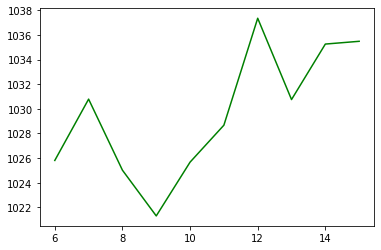

9

In [22]:
show_perplexity(review_cv, start=6, end=15)